# Radio Optical Transient Plot Example

This notebook provides some examples of how to use the package interactively.

Please refer to the bundled script `radio_optical_figures.py` to see commands for all the figures featured in the paper.

In [1]:
import pandas as pd
from radio_optical_transients_plot.ro_main import RadioOpticalPlot, RadioOpticalTrackPlot

## Basic Plot

Initialise the plot object, while also grouping the stellar sources.

In [2]:
example = RadioOpticalPlot(group_stellar=True)

Use generate plot to produce the base plot. Note it's useful to assign to a variable to have direct access to the figure if needed.

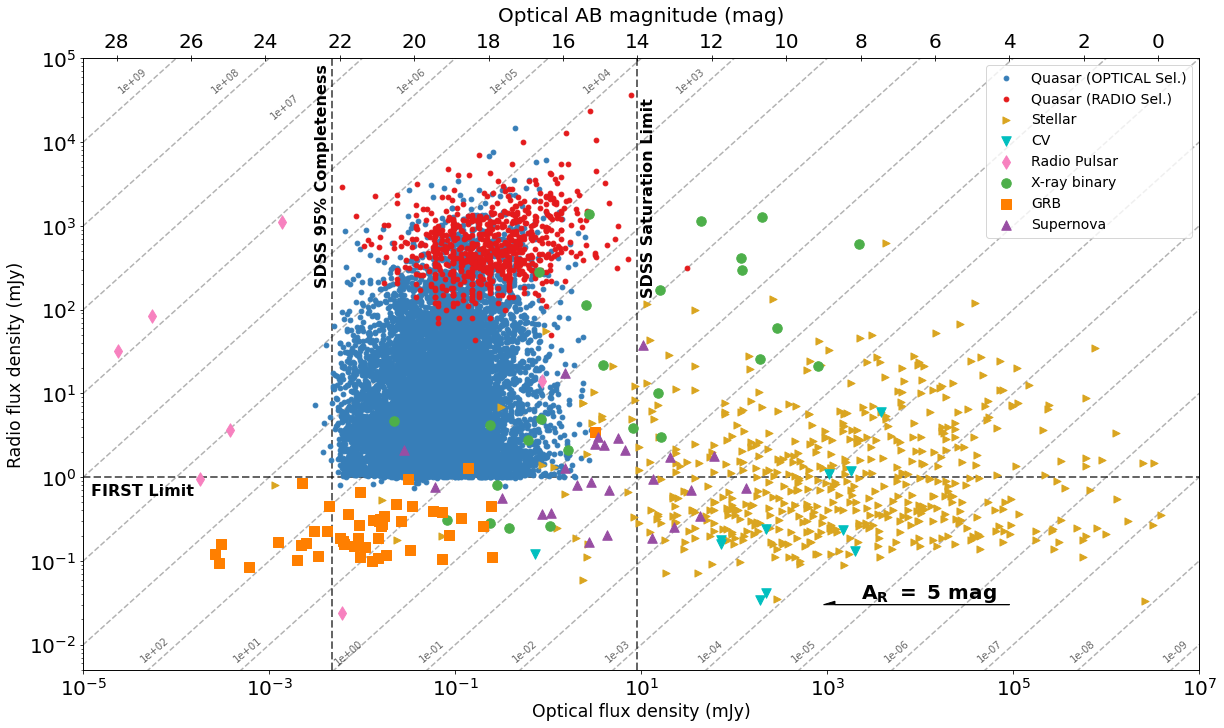

In [3]:
example_plot = example.generate_plot()

## Overlay New Datapoints

Create a new plot but now in background mode, also group agn this time.

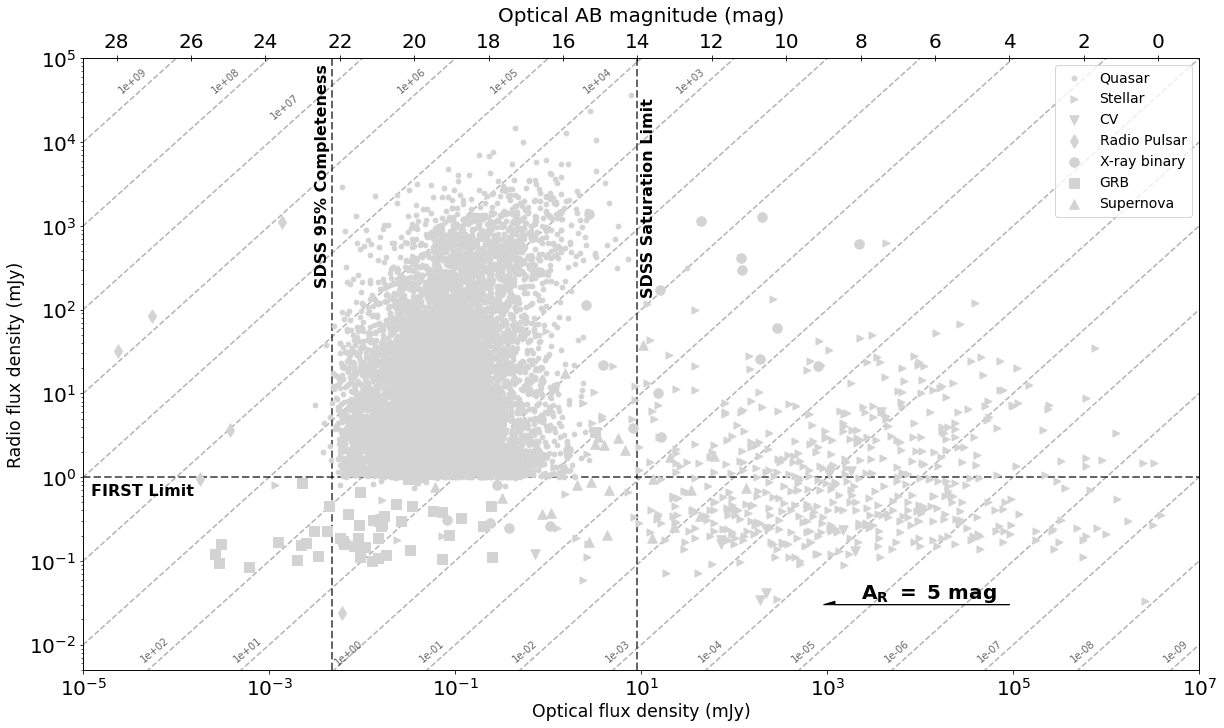

In [4]:
example = RadioOpticalPlot(group_stellar=True, group_agn=True)
example_plot = example.generate_plot(background=True)

### Add a single datapoint

A single datapoint can be added as demonostrated below, where a SN is added with a R band magnitude of 16 and a radio flux of 0.5 mJy.

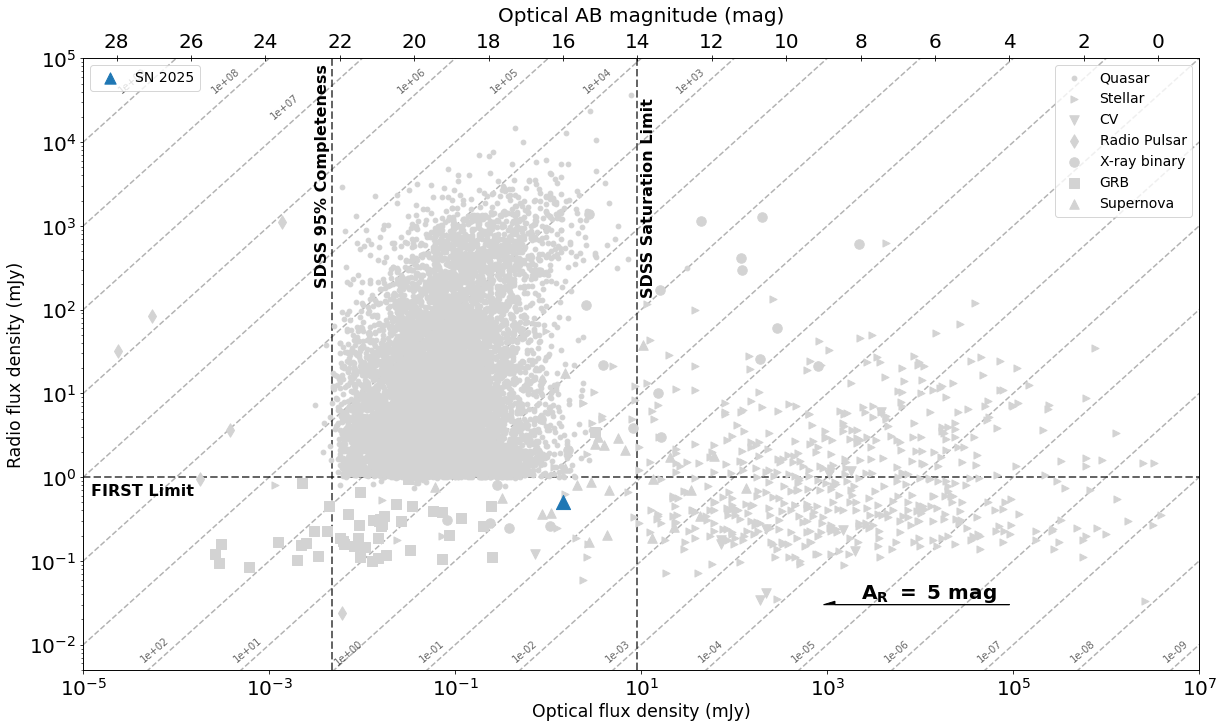

In [5]:
example_plot = example.add_datapoint('SN 2025', 16, 0.5, 'R', marker='^', markersize=200)
example_plot

### Add datapoints from a pandas dataframe

Define some new datapoints in the form of a DataFrame.

In [6]:
new_datapoints = pd.DataFrame.from_dict(
    {
        'Name': ['SN 2100', 'SN 2300', 'GRB 250401', 'GRB 300101', 'GRB 501225'],
        'Type': ['SN', 'SN', 'GRB', 'GRB', 'GRB'],
        'R': [14., 13., 25., 0., 22.],
        'V': [0., 0., 0., 23.5, 0.],
        'radio': [1., 10., 0.2, 0.5, 0.08],
    }
)

new_datapoints

,Name,Type,R,V,radio
0,SN 2100,SN,14.0,0.0,1.00
1,SN 2300,SN,13.0,0.0,10.00
2,GRB 250401,GRB,25.0,0.0,0.20
3,GRB 300101,GRB,0.0,23.5,0.50
4,GRB 501225,GRB,22.0,0.0,0.08


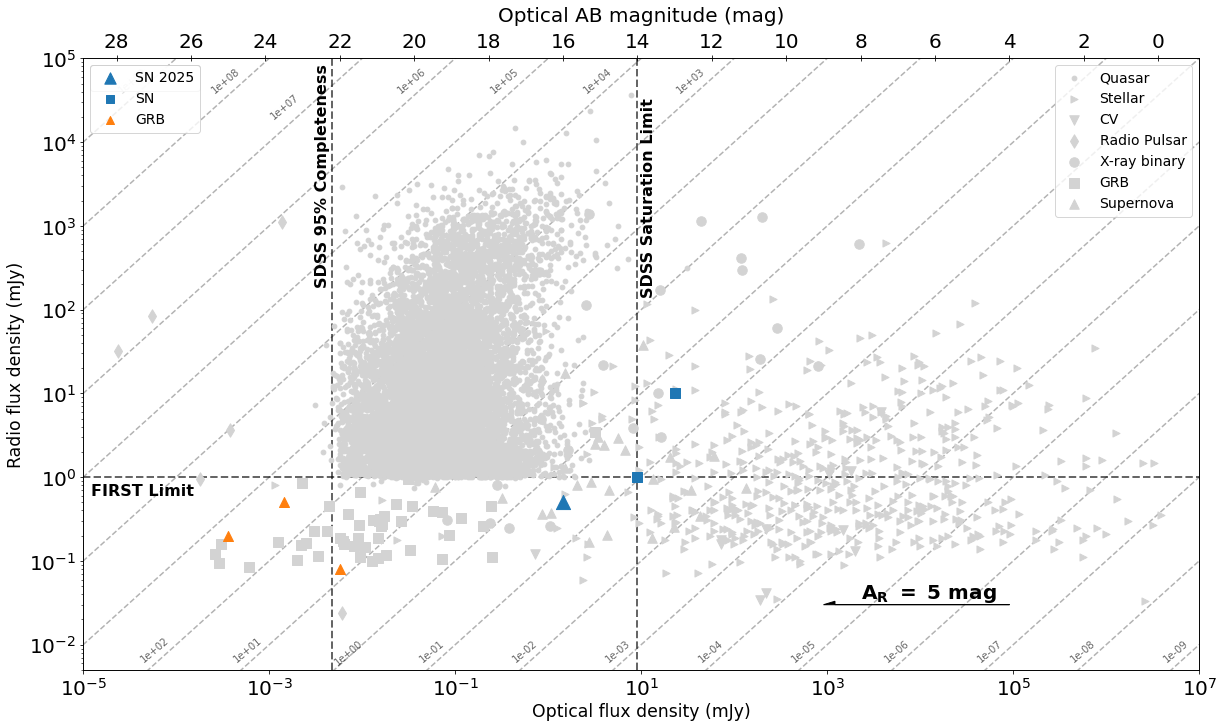

In [7]:
example_plot = example.add_datapoints_from_df(
    new_datapoints, markers=['s', '^', '>', 'o', 'D'], colors=['C0', 'C1', 'C2', 'C3', 'C4'], group_by_type=True
)
example_plot

## Tracks

To plot tracks the RadioOpticalTrackPlot needs to be initiated (with the usual options):

In [8]:
track_example = RadioOpticalTrackPlot(group_agn=True, group_stellar=True)

Can see what objects are available

In [9]:
track_example.list_packaged_tracks()

{'3C 454.3': 'Quasar',
 'BL Lacertae': 'Quasar',
 'BL Lacertae (3 month)': 'Quasar',
 'GRB 000301C': 'GRB',
 'GRB 030329': 'GRB',
 'GRB 050820A': 'GRB',
 'GRB 060218': 'GRB',
 'GRB 070125': 'GRB',
 'GRB 100418A': 'GRB',
 'GRB 970508': 'GRB',
 'GRB 991208': 'GRB',
 'GRO J0422+32': 'XRB',
 'GRO J1655-40': 'XRB',
 'GS 1124-684': 'XRB',
 'GX 339-4': 'XRB',
 'RS Oph': 'CV',
 'SN 1990B': 'SN',
 'SN 1993J': 'SN',
 'SN 1994I': 'SN',
 'SN 1998bw': 'SN',
 'SN 2002ap': 'SN',
 'SN 2004dj': 'SN',
 'SN 2004dk': 'SN',
 'SN 2004et': 'SN',
 'SN 2004gq': 'SN',
 'SN 2007bg': 'SN',
 'SN 2007gr': 'SN',
 'SN 2007uy': 'SN',
 'SN 2008D': 'SN',
 'SN 2008ax': 'SN',
 'SN 2009bb': 'SN',
 'SS Cyg': 'CV',
 'T Pyx': 'CV',
 'V1500 Cyg': 'CV',
 'V1974 Cyg': 'CV',
 'V404 Cyg': 'XRB',
 'XTE J0421+560': 'XRB',
 'XTE J1550-564': 'XRB',
 'XTE J1859+226': 'XRB'}


Can plot the packaged tracks with:

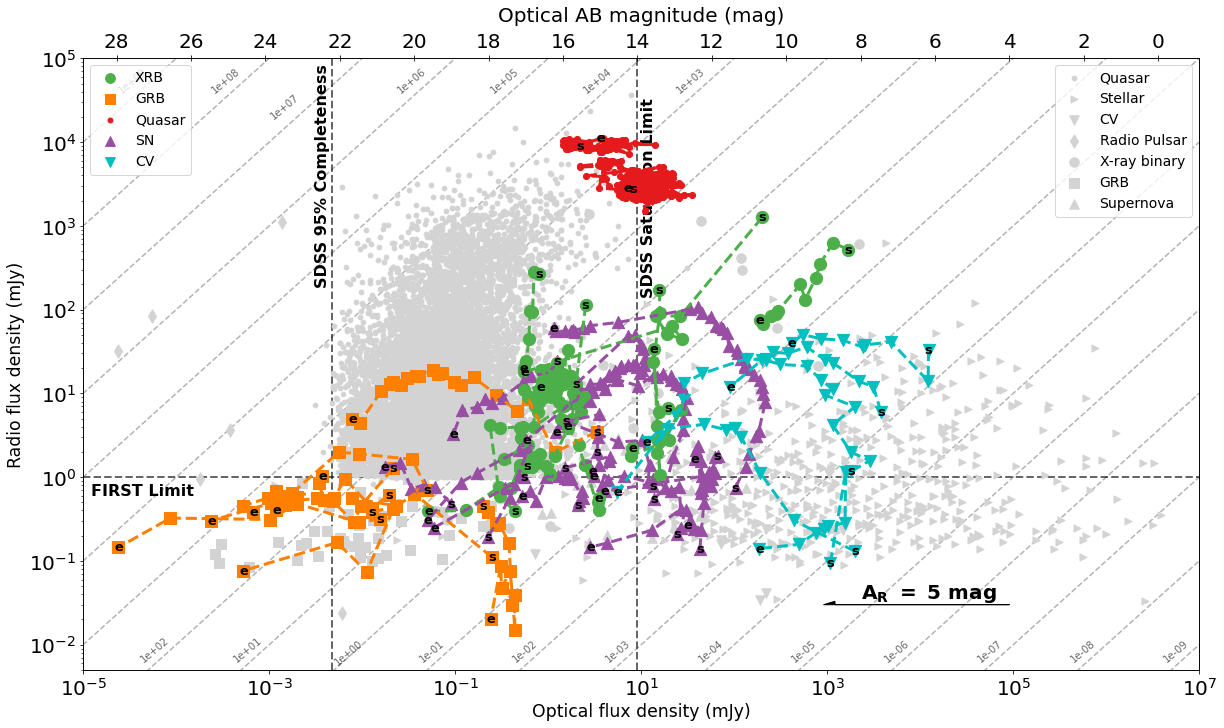

In [10]:
track_example_plot = track_example.generate_track_plot(group_tracks=True, summary_style=True, background=True)

## Adding custom tracks

Tracks can be added from a DataFrame. First initiate a new empty background plot. Empty in this case means no tracks are plotted.

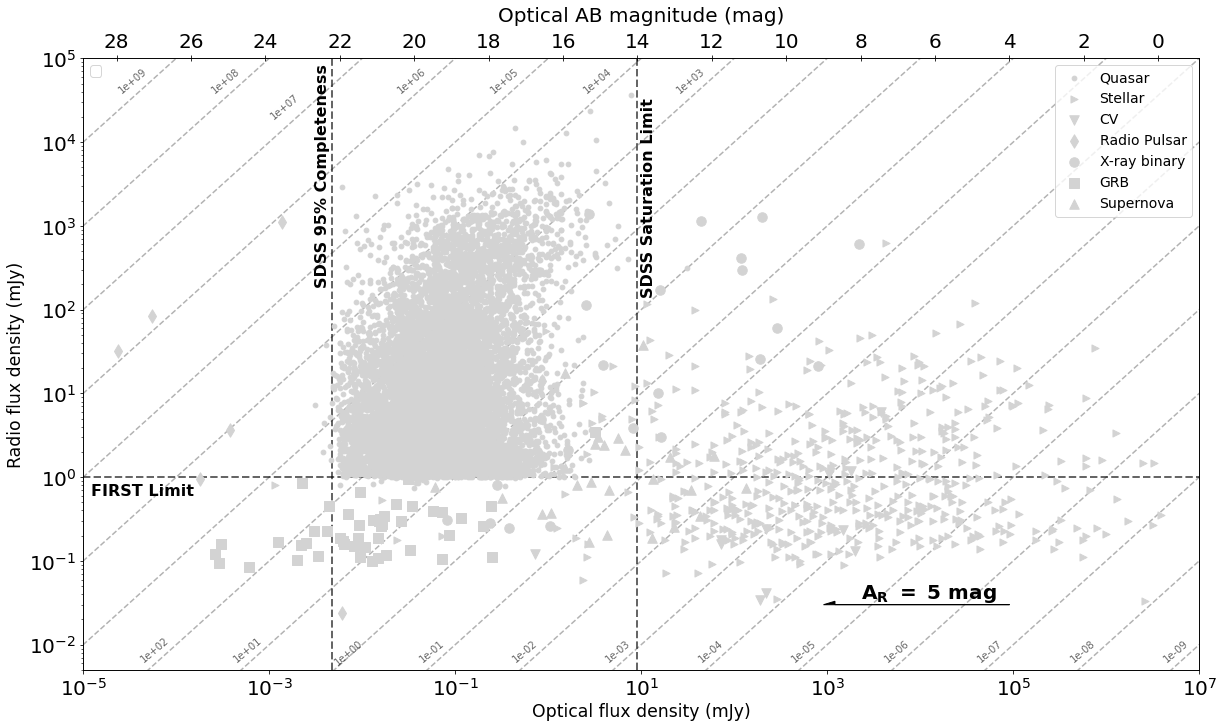

In [11]:
track_example_plot = track_example.generate_track_plot(empty=True, background=True)

Define the track lightcurve. Note that `Date` actually means `Days` in this case.

In [12]:
my_lightcurve = {
    "Name": "Example",
    "Date": [1, 2, 5, 8, 12, 30, 400],
    "R": [14.5, 13.5, 15.0, 16.0, 17.0, 22.0, 23.0],
    "radio": [0.1, 0.15, 0.5, 1.0, 1.2, 0.4, 0.1]
}
my_lightcurve = pd.DataFrame.from_dict(my_lightcurve)


my_lightcurve

,Name,Date,R,radio
0,Example,1,14.5,0.10
1,Example,2,13.5,0.15
2,Example,5,15.0,0.50
3,Example,8,16.0,1.00
4,Example,12,17.0,1.20
5,Example,30,22.0,0.40
6,Example,400,23.0,0.10


Add this to the `track_example` object:

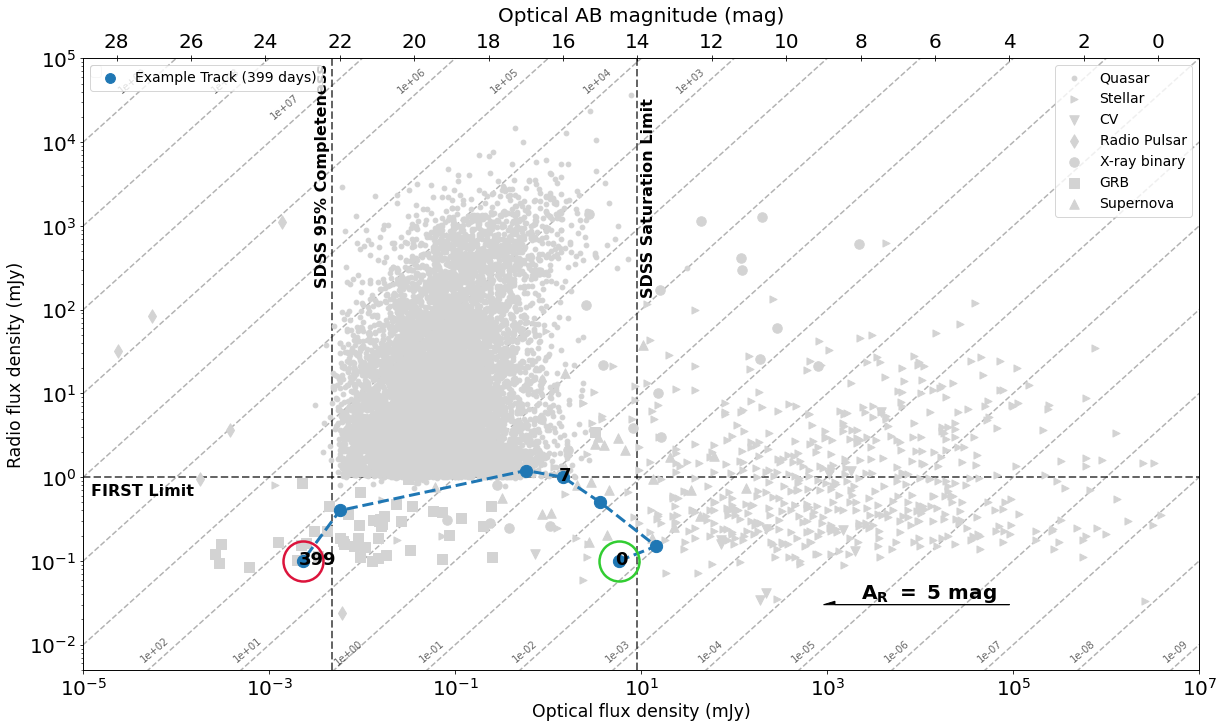

In [13]:
track_example.add_custom_track(my_lightcurve, "Example Track", background=True)

You can still add datapoints as previously demonstrated:

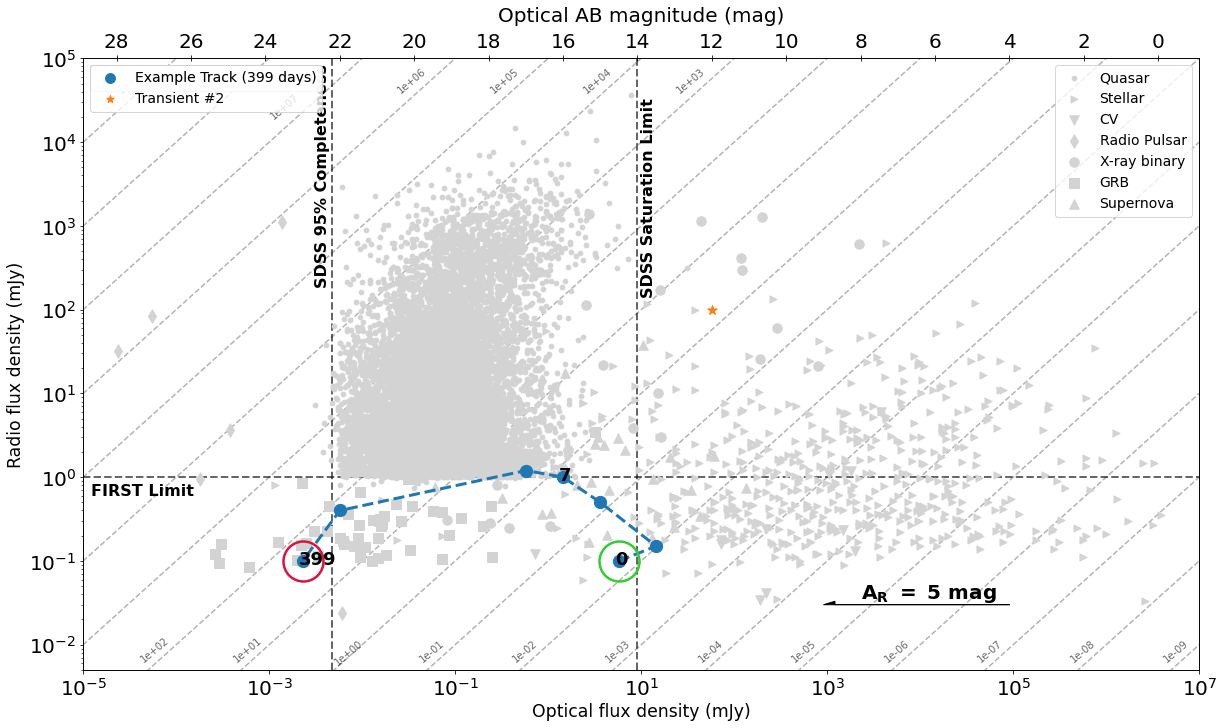

In [14]:
track_example.add_datapoint("Transient #2", 12., 100., marker="*", color="tab:orange")

You can access the figure of an object at any time by using the `current_fig` attribute:

In [15]:
the_fig = track_example.current_fig

If you want to clear the current figure from the object you can use:

In [16]:
track_example.clear_current_fig()